PREPROCESSING DATA

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE


In [2]:
# 1. Input dataset
dataset = pd.read_csv('datapneumonia.csv')

In [3]:
dataset

,Nama Pasien,Usia,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,CRP(mg/L),Darah Putih(x10⁹/L),Riwayat Penyakit,Diagnosis
0,M. ANNASA I,7 bulan,L,Ya,Ya,Ya,Tidak,70.2,18.8,Tidak Ada,Pnuemonia Sedang
1,CHRISTIAN REINARDO NOEL,4.9 tahun,L,Ya,Tidak,Ya,Ya,56.1,18.9,Tidak Ada,Pnuemonia Sedang
2,Fenicia Adelin Tarigan,7 TH,P,Ya,Ya,Tidak,Tidak,22.8,11.7,Tidak Ada,Pnuemonia Ringan
3,AMRAN,56 TH,L,Ya,Ya,Ya,Tidak,57.5,15.3,Tidak Ada,Pnuemonia Sedang
4,ABDURROZZAQ AZ- ZUBAIR,10 BULAN,L,Ya,Tidak,Tidak,Ya,20.4,12.4,Tidak Ada,Pnuemonia Ringan
...,...,...,...,...,...,...,...,...,...,...,...
235,NAFIS RIFAI,3 TH,L,Ya,Ya,ya,Ya,107.4,22.6,TIDAK ADA,Pneumonia Berat
236,ADIBA NATISYA,9 BULAN,P,Ya,Ya,ya,Tidak,56.7,19.8,TIDAK ADA,Pneumonia Sedang
237,KAROMATUL AULIA,1 TH,P,Ya,Tidak,ya,Ya,64.2,16.1,TIDAK ADA,Pneumonia Sedang
238,BOBY NANDA,8 TH,L,Ya,Tidak,Tidak,Ya,20.3,10.3,TIDAK ADA,Pneumonia Ringan


In [4]:
# 2. Menghapus kolom Nama Pasien
if 'Nama Pasien' in dataset.columns:
    dataset.drop(columns=['Nama Pasien'], inplace=True)
    print("\nKolom 'Nama Pasien' dihapus karena tidak relevan untuk pemodelan.")


Kolom 'Nama Pasien' dihapus karena tidak relevan untuk pemodelan.


In [5]:
# 3. Pengecekan Data
print("Informasi Dataset:")
print(dataset.info())
print("\nJumlah Missing Values:")
print(dataset.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 240 non-null    object 
 1   Jenis Kelamin        240 non-null    object 
 2   Batuk                240 non-null    object 
 3   Demam                240 non-null    object 
 4   Kesulitan Bernapas   240 non-null    object 
 5   Pilek                240 non-null    object 
 6   CRP(mg/L)            240 non-null    float64
 7   Darah Putih(x10⁹/L)  240 non-null    float64
 8   Riwayat Penyakit     240 non-null    object 
 9   Diagnosis            240 non-null    object 
dtypes: float64(2), object(8)
memory usage: 18.9+ KB
None

Jumlah Missing Values:
Usia                   0
Jenis Kelamin          0
Batuk                  0
Demam                  0
Kesulitan Bernapas     0
Pilek                  0
CRP(mg/L)              0
Darah Putih(x10⁹/L)

In [6]:
dataset['Usia'] = dataset['Usia'].str.lower().str.strip()

In [7]:
def convert_usia(value):
    value = value.lower().replace(",", ".")  # Replace commas with dots for decimal numbers
    if "bulan" in value or "bln" in value:
        return float(value.split()[0]) / 12  # Convert months to years
    elif "tahun" in value or "th" in value:
        return float(value.split()[0].replace("th", "").strip())  # Convert years
    else:
        return np.nan  # Handle unexpected cases
# Apply the conversion
dataset['Usia (tahun)'] = dataset['Usia'].apply(convert_usia)
dataset.drop(columns=['Usia'], inplace=True)  # Hapus kolom Usia asli
dataset['Usia (tahun)'].fillna(dataset['Usia (tahun)'].median(), inplace=True)  # Imputasi median

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jenis Kelamin        240 non-null    object 
 1   Batuk                240 non-null    object 
 2   Demam                240 non-null    object 
 3   Kesulitan Bernapas   240 non-null    object 
 4   Pilek                240 non-null    object 
 5   CRP(mg/L)            240 non-null    float64
 6   Darah Putih(x10⁹/L)  240 non-null    float64
 7   Riwayat Penyakit     240 non-null    object 
 8   Diagnosis            240 non-null    object 
 9   Usia (tahun)         240 non-null    float64
dtypes: float64(3), object(7)
memory usage: 18.9+ KB


In [9]:
# 5. Normalisasi penamaan kelas diagnosis
if 'Diagnosis' in dataset.columns:
    # Menghapus spasi di depan dan belakang, serta mengganti kesalahan pengetikan
    dataset['Diagnosis'] = dataset['Diagnosis'].str.strip()  # Menghapus spasi di depan dan belakang
    dataset['Diagnosis'] = dataset['Diagnosis'].str.replace('Pnuemonia', 'Pneumonia', regex=False)  # Mengganti typo
    dataset['Diagnosis'] = dataset['Diagnosis'].str.replace(' Pnuemonia Berat', 'Pneumonia Berat', regex=False)  # Mengganti typo dan spasi
    dataset['Diagnosis'] = dataset['Diagnosis'].str.replace('Pneumonia Berat', 'Pneumonia Berat', regex=False)  # Pastikan konsistensi
    dataset['Diagnosis'] = dataset['Diagnosis'].str.replace('Pneumonia Ringan', 'Pneumonia Ringan', regex=False)  # Pastikan konsistensi
    dataset['Diagnosis'] = dataset['Diagnosis'].str.replace('Pneumonia Sedang', 'Pneumonia Sedang', regex=False)  # Pastikan konsistensi

    # Cek nilai unik setelah pembersihan
    print("Nilai unik setelah pembersihan:", dataset['Diagnosis'].unique())

Nilai unik setelah pembersihan: ['Pneumonia Sedang' 'Pneumonia Ringan' 'Pneumonia Berat']


In [10]:
dataset['Riwayat Penyakit'] = dataset['Riwayat Penyakit'].str.lower().str.strip()
# Preprocess "Riwayat Penyakit" column again
dataset['Riwayat Penyakit (Encoded)'] = dataset['Riwayat Penyakit'].apply(
    lambda x: 0 if x.lower() == "tidak ada" else 1
)
dataset.drop(columns=['Riwayat Penyakit'], inplace=True)  # Hapus kolom Riwayat penyakit asli

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenis Kelamin               240 non-null    object 
 1   Batuk                       240 non-null    object 
 2   Demam                       240 non-null    object 
 3   Kesulitan Bernapas          240 non-null    object 
 4   Pilek                       240 non-null    object 
 5   CRP(mg/L)                   240 non-null    float64
 6   Darah Putih(x10⁹/L)         240 non-null    float64
 7   Diagnosis                   240 non-null    object 
 8   Usia (tahun)                240 non-null    float64
 9   Riwayat Penyakit (Encoded)  240 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 18.9+ KB


In [12]:
# Check unique values in the identified categorical columns
categorical_columns = ['Usia (tahun)', 'Jenis Kelamin', 'Batuk', 'Demam', 'Kesulitan Bernapas','Pilek', 'Riwayat Penyakit (Encoded)','Diagnosis']
unique_values = {col: dataset[col].dropna().unique()[:10] for col in categorical_columns}  # Display up to 10 unique values per column
unique_values

{'Usia (tahun)': array([ 0.58333333,  4.9       ,  7.        , 56.        ,  0.83333333,
        54.        , 36.        ,  8.        ,  5.        ,  4.        ]),
 'Jenis Kelamin': array(['L', 'P'], dtype=object),
 'Batuk': array(['Ya', 'ya'], dtype=object),
 'Demam': array(['Ya', 'Tidak'], dtype=object),
 'Kesulitan Bernapas': array(['Ya', 'Tidak', 'ya', 'tidak'], dtype=object),
 'Pilek': array(['Tidak', 'Ya', 'tidak', 'ya'], dtype=object),
 'Riwayat Penyakit (Encoded)': array([0, 1], dtype=int64),
 'Diagnosis': array(['Pneumonia Sedang', 'Pneumonia Ringan', 'Pneumonia Berat'],
       dtype=object)}

In [13]:
print(dataset['Riwayat Penyakit (Encoded)'].unique()) 

[0 1]


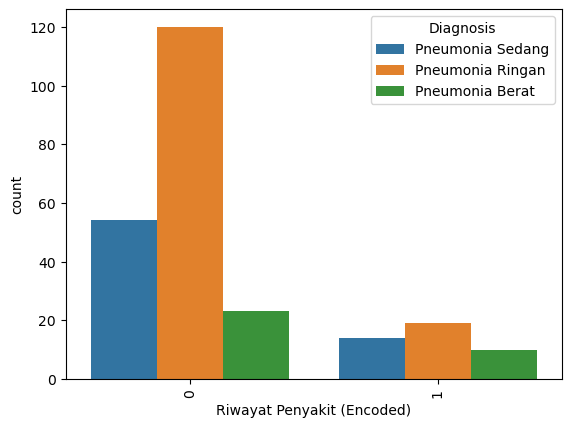

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh distribusi nilai berdasarkan target
sns.countplot(data=dataset, x='Riwayat Penyakit (Encoded)', hue='Diagnosis')
plt.xticks(rotation=90)
plt.show()

In [15]:
dataset

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,CRP(mg/L),Darah Putih(x10⁹/L),Diagnosis,Usia (tahun),Riwayat Penyakit (Encoded)
0,L,Ya,Ya,Ya,Tidak,70.2,18.8,Pneumonia Sedang,0.583333,0
1,L,Ya,Tidak,Ya,Ya,56.1,18.9,Pneumonia Sedang,4.900000,0
2,P,Ya,Ya,Tidak,Tidak,22.8,11.7,Pneumonia Ringan,7.000000,0
3,L,Ya,Ya,Ya,Tidak,57.5,15.3,Pneumonia Sedang,56.000000,0
4,L,Ya,Tidak,Tidak,Ya,20.4,12.4,Pneumonia Ringan,0.833333,0
...,...,...,...,...,...,...,...,...,...,...
235,L,Ya,Ya,ya,Ya,107.4,22.6,Pneumonia Berat,3.000000,0
236,P,Ya,Ya,ya,Tidak,56.7,19.8,Pneumonia Sedang,0.750000,0
237,P,Ya,Tidak,ya,Ya,64.2,16.1,Pneumonia Sedang,1.000000,0
238,L,Ya,Tidak,Tidak,Ya,20.3,10.3,Pneumonia Ringan,8.000000,0


In [16]:
# 6. Encoding Fitur Kategorikal
label_encoder = LabelEncoder()
kategori_columns = ['Jenis Kelamin', 'Batuk', 'Demam', 'Kesulitan Bernapas', 'Pilek']

for col in kategori_columns:
    if col in dataset.columns:
        dataset[col] = label_encoder.fit_transform(dataset[col])
        print(f"Kolom '{col}' telah di-encode.")

Kolom 'Jenis Kelamin' telah di-encode.
Kolom 'Batuk' telah di-encode.
Kolom 'Demam' telah di-encode.
Kolom 'Kesulitan Bernapas' telah di-encode.
Kolom 'Pilek' telah di-encode.


In [17]:
# 7. Encoding Diagnosis sebagai Target
if 'Diagnosis' in dataset.columns:
    print("Nilai unik sebelum encoding:", dataset['Diagnosis'].unique())
    dataset['Diagnosis'] = label_encoder.fit_transform(dataset['Diagnosis'])
    dataset.rename(columns={'Diagnosis': 'Label Kelas'}, inplace=True)
    print("\nKolom 'Diagnosis' di-encode sebagai target klasifikasi dan diubah namanya menjadi 'Label Kelas'.")

Nilai unik sebelum encoding: ['Pneumonia Sedang' 'Pneumonia Ringan' 'Pneumonia Berat']

Kolom 'Diagnosis' di-encode sebagai target klasifikasi dan diubah namanya menjadi 'Label Kelas'.


In [18]:
dataset

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,CRP(mg/L),Darah Putih(x10⁹/L),Label Kelas,Usia (tahun),Riwayat Penyakit (Encoded)
0,0,0,1,1,0,70.2,18.8,2,0.583333,0
1,0,0,0,1,1,56.1,18.9,2,4.900000,0
2,1,0,1,0,0,22.8,11.7,1,7.000000,0
3,0,0,1,1,0,57.5,15.3,2,56.000000,0
4,0,0,0,0,1,20.4,12.4,1,0.833333,0
...,...,...,...,...,...,...,...,...,...,...
235,0,0,1,3,1,107.4,22.6,0,3.000000,0
236,1,0,1,3,0,56.7,19.8,2,0.750000,0
237,1,0,0,3,1,64.2,16.1,2,1.000000,0
238,0,0,0,0,1,20.3,10.3,1,8.000000,0


In [19]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()
# Apply Min-Max Scaling to CRP and Darah Putih columns
dataset[['CRP(mg/L) (norm)', 'Darah Putih(x10⁹/L) (norm)']] = scaler.fit_transform(
    dataset[['CRP(mg/L)', 'Darah Putih(x10⁹/L)']]
)
dataset.drop(columns=['CRP(mg/L)', 'Darah Putih(x10⁹/L)'], inplace=True)
dataset

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,Label Kelas,Usia (tahun),Riwayat Penyakit (Encoded),CRP(mg/L) (norm),Darah Putih(x10⁹/L) (norm)
0,0,0,1,1,0,2,0.583333,0,0.474808,0.517857
1,0,0,0,1,1,2,4.900000,0,0.354398,0.523810
2,1,0,1,0,0,1,7.000000,0,0.070026,0.095238
3,0,0,1,1,0,2,56.000000,0,0.366354,0.309524
4,0,0,0,0,1,1,0.833333,0,0.049530,0.136905
...,...,...,...,...,...,...,...,...,...,...
235,0,0,1,3,1,0,3.000000,0,0.792485,0.744048
236,1,0,1,3,0,2,0.750000,0,0.359522,0.577381
237,1,0,0,3,1,2,1.000000,0,0.423570,0.357143
238,0,0,0,0,1,1,8.000000,0,0.048676,0.011905


In [20]:
# # 8. Normalisasi Fitur Numerik
# scaler = MinMaxScaler()
# numerik_columns = ['CRP', 'Darah Putih']

# for col in numerik_columns:
#     if col in dataset.columns:
#         dataset[col] = scaler.fit_transform(dataset[[col]])
#         print(f"Kolom '{col}' telah dinormalisasi menggunakan MinMaxScaler.")

In [21]:
# 9. Seleksi Fitur dan Target
X = dataset.drop(columns=['Label Kelas'])  # Semua kolom kecuali target
y = dataset['Label Kelas']  # Target klasifikasi

In [22]:
print("\nFitur yang Digunakan untuk Pemodelan:")
print(X.columns)


Fitur yang Digunakan untuk Pemodelan:
Index(['Jenis Kelamin', 'Batuk', 'Demam', 'Kesulitan Bernapas', 'Pilek',
       'Usia (tahun)', 'Riwayat Penyakit (Encoded)', 'CRP(mg/L) (norm)',
       'Darah Putih(x10⁹/L) (norm)'],
      dtype='object')


In [23]:
#10. Split Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("\nJumlah Data Training dan Testing:")
print(f"Data Training: {X_train.shape[0]} sampel")
print(f"Data Testing: {X_test.shape[0]} sampel")


Jumlah Data Training dan Testing:
Data Training: 192 sampel
Data Testing: 48 sampel


In [24]:
# 11. Menangani Ketidakseimbangan Data dengan SMOTE
print("\n=== Menangani Ketidakseimbangan Data dengan SMOTE ===")
smote = SMOTE(random_state=42, k_neighbors=2)  # Gunakan 2 tetangga jika minoritas memiliki 3 sampel
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribusi Label Setelah Oversampling (Training Set):")
print(pd.Series(y_train_balanced).value_counts())


=== Menangani Ketidakseimbangan Data dengan SMOTE ===
Distribusi Label Setelah Oversampling (Training Set):
Label Kelas
2    111
1    111
0    111
Name: count, dtype: int64


PEMODELAN

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

In [26]:
# Membuat Model Random Forest dengan Class Weight Balanced
rf_default = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_default.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# Prediksi menggunakan model default
y_pred_default = rf_default.predict(X_test)

In [28]:
# Evaluasi Model Default
print("\n=== Evaluasi Model Default ===")
print("Akurasi:", accuracy_score(y_test, y_pred_default))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))


=== Evaluasi Model Default ===
Akurasi: 0.9791666666666666

Confusion Matrix:
[[ 6  0  0]
 [ 0 28  0]
 [ 0  1 13]]


In [29]:
# Tambahkan zero_division=1 dalam Classification Report
print("\nClassification Report dengan zero_division=1:")
print(classification_report(y_test, y_pred_default, zero_division=1))


Classification Report dengan zero_division=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.97      1.00      0.98        28
           2       1.00      0.93      0.96        14

    accuracy                           0.98        48
   macro avg       0.99      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [30]:
#Oversampling dengan SMOTE
print("\n=== Menggunakan SMOTE untuk Balancing Data ===")
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Distribusi Label Setelah SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


=== Menggunakan SMOTE untuk Balancing Data ===
Distribusi Label Setelah SMOTE:
Label Kelas
2    111
1    111
0    111
Name: count, dtype: int64


In [31]:
#Hyperparameter Tuning dengan GridSearchCV
print("\n=== Hyperparameter Tuning ===")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}


=== Hyperparameter Tuning ===


In [32]:
# Menggunakan StratifiedKFold dengan shuffle
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=stratified_kfold,  # Stratified K-Fold
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [33]:
# Melatih model dengan GridSearchCV pada data yang sudah dioversample
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [34]:
# Menampilkan hasil hyperparameter tuning
print("\n=== Hasil Hyperparameter Tuning ===")
print(f"Parameter Terbaik: {grid_search.best_params_}")
print(f"Skor Terbaik: {grid_search.best_score_:.4f}")


=== Hasil Hyperparameter Tuning ===
Parameter Terbaik: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Skor Terbaik: 1.0000


In [35]:
# Menggunakan model terbaik
best_rf = grid_search.best_estimator_

In [36]:
# 3. Evaluasi Model dengan Data Testing
print("\n=== Evaluasi Model Terbaik ===")
y_pred_tuned = best_rf.predict(X_test)


=== Evaluasi Model Terbaik ===


In [37]:
print("Akurasi:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report dengan zero_division=1:")
print(classification_report(y_test, y_pred_tuned, zero_division=1))

Akurasi: 0.9791666666666666

Confusion Matrix:
[[ 6  0  0]
 [ 0 28  0]
 [ 0  1 13]]

Classification Report dengan zero_division=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.97      1.00      0.98        28
           2       1.00      0.93      0.96        14

    accuracy                           0.98        48
   macro avg       0.99      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



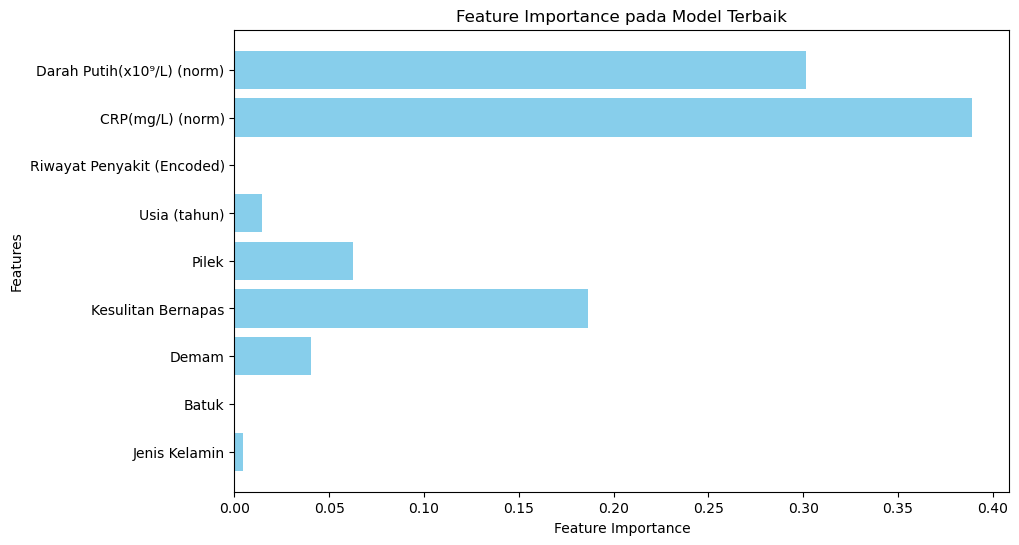

In [38]:
# Analisis Feature Importance
import matplotlib.pyplot as plt
feature_importance = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance pada Model Terbaik')
plt.show()

In [39]:
import pickle
from sklearn.ensemble import RandomForestClassifier

#menyimpan model
with open('model_random_forest.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

In [40]:
dataset

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,Label Kelas,Usia (tahun),Riwayat Penyakit (Encoded),CRP(mg/L) (norm),Darah Putih(x10⁹/L) (norm)
0,0,0,1,1,0,2,0.583333,0,0.474808,0.517857
1,0,0,0,1,1,2,4.900000,0,0.354398,0.523810
2,1,0,1,0,0,1,7.000000,0,0.070026,0.095238
3,0,0,1,1,0,2,56.000000,0,0.366354,0.309524
4,0,0,0,0,1,1,0.833333,0,0.049530,0.136905
...,...,...,...,...,...,...,...,...,...,...
235,0,0,1,3,1,0,3.000000,0,0.792485,0.744048
236,1,0,1,3,0,2,0.750000,0,0.359522,0.577381
237,1,0,0,3,1,2,1.000000,0,0.423570,0.357143
238,0,0,0,0,1,1,8.000000,0,0.048676,0.011905


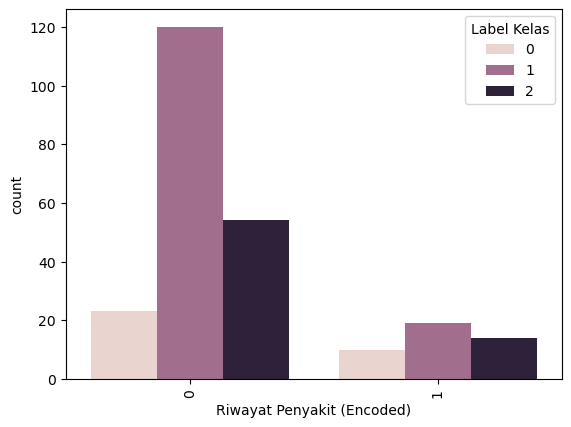

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh distribusi nilai berdasarkan target
sns.countplot(data=dataset, x='Riwayat Penyakit (Encoded)', hue='Label Kelas')
plt.xticks(rotation=90)
plt.show()

In [42]:
import pickle
# Memuat model dari file
with open("model_random_forest.pkl", "rb") as file:
    model = pickle.load(file)
# Memastikan model memiliki metode predict()
print(type(model))  # Harus menunjukkan jenis model seperti sklearn classifier

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [43]:
# Membuat DataFrame dari feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Mengurutkan DataFrame berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame
print(feature_importance_df)


                      Feature  Importance
7            CRP(mg/L) (norm)    0.389329
8  Darah Putih(x10⁹/L) (norm)    0.301584
3          Kesulitan Bernapas    0.186719
4                       Pilek    0.062396
2                       Demam    0.040517
5                Usia (tahun)    0.014486
0               Jenis Kelamin    0.004558
6  Riwayat Penyakit (Encoded)    0.000209
1                       Batuk    0.000202


In [44]:
data = dataset[features]
data.head()

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,Usia (tahun),Riwayat Penyakit (Encoded),CRP(mg/L) (norm),Darah Putih(x10⁹/L) (norm)
0,0,0,1,1,0,0.583333,0,0.474808,0.517857
1,0,0,0,1,1,4.900000,0,0.354398,0.523810
2,1,0,1,0,0,7.000000,0,0.070026,0.095238
3,0,0,1,1,0,56.000000,0,0.366354,0.309524
4,0,0,0,0,1,0.833333,0,0.049530,0.136905


In [45]:
combined_df = pd.concat([data, y], axis=1)
combined_df

,Jenis Kelamin,Batuk,Demam,Kesulitan Bernapas,Pilek,Usia (tahun),Riwayat Penyakit (Encoded),CRP(mg/L) (norm),Darah Putih(x10⁹/L) (norm),Label Kelas
0,0,0,1,1,0,0.583333,0,0.474808,0.517857,2
1,0,0,0,1,1,4.900000,0,0.354398,0.523810,2
2,1,0,1,0,0,7.000000,0,0.070026,0.095238,1
3,0,0,1,1,0,56.000000,0,0.366354,0.309524,2
4,0,0,0,0,1,0.833333,0,0.049530,0.136905,1
...,...,...,...,...,...,...,...,...,...,...
235,0,0,1,3,1,3.000000,0,0.792485,0.744048,0
236,1,0,1,3,0,0.750000,0,0.359522,0.577381,2
237,1,0,0,3,1,1.000000,0,0.423570,0.357143,2
238,0,0,0,0,1,8.000000,0,0.048676,0.011905,1


In [46]:
combined_df.to_csv('datapneumonia_clean.csv', index=False)

In [47]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)